## Throughout this I will analyze the available crime data for St. Louis for the year 2020

In [1]:
import pandas as pd
import os

#getting all 12 csv files, each representing one month of St. Louis' crime data

files = [file for file in os.listdir('./Year_2020')]

all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Year_2020/'+file, encoding='cp1252')
    all_data = pd.concat([all_data, df])
    print("Done")
    
all_data.to_csv('all_data.csv', index=False)


Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


In [2]:
all_data = pd.read_csv('all_data.csv')

all_data.head()

,Complaint,CodedMonth,DateOccur,FlagCrime,FlagUnfounded,FlagAdministrative,Count,FlagCleanup,Crime,District,...,ILEADSAddress,ILEADSStreet,Neighborhood,LocationName,LocationComment,CADAddress,CADStreet,XCoord,YCoord,Ycoord
0,20-018029,2020-04,01/01/2019 12:00,Y,,,1,,115400,6,...,4712,MARGARETTA AVE,69,,,4712,MARGARETTA,893518.0,1034869.0,NaN
1,20-015410,2020-04,01/01/2020 12:00,Y,,,1,,115400,5,...,4314,MARYLAND AVE,38,,,4314,MARYLAND,891393.3,1022752.0,NaN
2,20-000941,2020-04,01/02/2020 15:30,Y,,,1,,115100,1,...,4965,NAGEL AVE,6,,,4965,NAGEL,880529.1,996293.3,NaN
3,20-016299,2020-04,01/05/2020 07:15,Y,,,1,,266999,5,...,5453,DELMAR BLVD,49,,,5453,DELMAR,883561.5,1027076.0,NaN
4,20-017400,2020-04,01/10/2020 08:00,Y,,,1,,69702,4,...,3013,BELL AVE,59,,,3013,BELL,899950.4,1022271.0,NaN


In [4]:
#Add a new month column

all_data['Month'] = all_data['CodedMonth'].str[5:7]
all_data.head()

,Complaint,CodedMonth,DateOccur,FlagCrime,FlagUnfounded,FlagAdministrative,Count,FlagCleanup,Crime,District,...,ILEADSStreet,Neighborhood,LocationName,LocationComment,CADAddress,CADStreet,XCoord,YCoord,Ycoord,Month
0,20-018029,2020-04,01/01/2019 12:00,Y,,,1,,115400,6,...,MARGARETTA AVE,69,,,4712,MARGARETTA,893518.0,1034869.0,NaN,04
1,20-015410,2020-04,01/01/2020 12:00,Y,,,1,,115400,5,...,MARYLAND AVE,38,,,4314,MARYLAND,891393.3,1022752.0,NaN,04
2,20-000941,2020-04,01/02/2020 15:30,Y,,,1,,115100,1,...,NAGEL AVE,6,,,4965,NAGEL,880529.1,996293.3,NaN,04
3,20-016299,2020-04,01/05/2020 07:15,Y,,,1,,266999,5,...,DELMAR BLVD,49,,,5453,DELMAR,883561.5,1027076.0,NaN,04
4,20-017400,2020-04,01/10/2020 08:00,Y,,,1,,69702,4,...,BELL AVE,59,,,3013,BELL,899950.4,1022271.0,NaN,04


## Question 2: What is the level of crime per month, throughout the year?

In [25]:

top_district = all_data.groupby('District').sum()
top_district

,Count,Crime,Neighborhood,XCoord,YCoord,Ycoord
District,,,,,,
0,135,17395311,0,2.906765e+07,2.936304e+07,5208675.7
1,7155,846277318,58496,5.998720e+09,6.069714e+09,654873665.9
2,6237,700118944,141514,5.141912e+09,5.342892e+09,529445441.0
3,6442,786467612,155830,5.479980e+09,5.592333e+09,551241744.0
4,9294,1150109294,460636,7.914831e+09,8.121047e+09,816431970.0
5,7304,851231108,372547,6.098943e+09,6.444781e+09,626807368.0
6,7175,914462361,514919,6.100944e+09,6.455028e+09,643058689.0


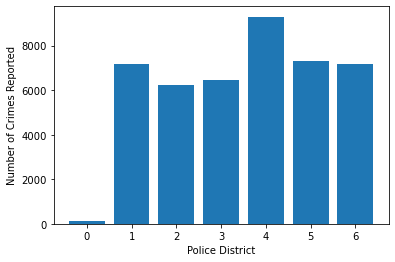

In [26]:
import matplotlib.pyplot as plt

district = [district for district, df in all_data.groupby('District')]

plt.bar(district, top_district['Count'])
plt.xticks(district)
plt.ylabel('Number of Crimes Reported')
plt.xlabel('Police District')
plt.show()

## Question 1: What District had the most crime for the entire year?

In [29]:
top_month = all_data.groupby('Month').sum()
top_month

,Count,Crime,District,Neighborhood,XCoord,YCoord,Ycoord
Month,,,,,,,
01,3843,495240387,14143,150899,3.433249e+09,3.912082e+09,0.000000e+00
02,3385,451614669,12543,133292,3.041093e+09,3.465359e+09,0.000000e+00
03,3307,409684300,12176,131370,2.967782e+09,3.381596e+09,0.000000e+00
04,2958,341452731,10823,116406,2.637497e+09,3.007448e+09,0.000000e+00
05,3265,384679637,11758,126083,2.892639e+09,3.294482e+09,0.000000e+00
06,4291,494524190,15732,167932,3.830334e+09,4.361724e+09,0.000000e+00
07,4013,468379485,14549,156211,3.601202e+09,4.100654e+09,0.000000e+00
08,4125,497628052,14816,157530,3.646126e+09,4.151326e+09,0.000000e+00
09,3918,479272400,14629,155386,3.493969e+09,3.982336e+09,0.000000e+00


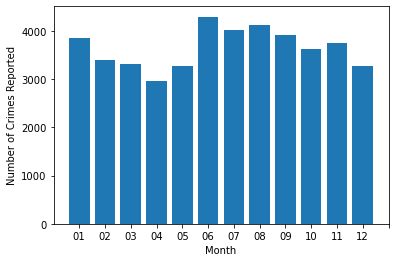

In [48]:

months = range(0,13)

plt.bar(month, top_month['Count'])
plt.xticks(months)
plt.ylabel('Number of Crimes Reported')
plt.xlabel('Month')
plt.show()

In [5]:
#Question 3: For each month, what district had the most crime count?
top_district = all_data.groupby('District').sum()
top_district

,Count,Crime,Neighborhood,XCoord,YCoord,Ycoord
District,,,,,,
0,135,17395311,0,2.906765e+07,2.936304e+07,5208675.7
1,7155,846277318,58496,5.998720e+09,6.069714e+09,654873665.9
2,6237,700118944,141514,5.141912e+09,5.342892e+09,529445441.0
3,6442,786467612,155830,5.479980e+09,5.592333e+09,551241744.0
4,9294,1150109294,460636,7.914831e+09,8.121047e+09,816431970.0
5,7304,851231108,372547,6.098943e+09,6.444781e+09,626807368.0
6,7175,914462361,514919,6.100944e+09,6.455028e+09,643058689.0
